In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path=r'C:\Users\rishi\Downloads\cardio_train.csv'
df=pd.read_csv(path,sep=';')
df=df.drop('id',axis=1)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Understanding dataset

* **age:** The person's age in days
* **sex:** The person's sex (1 = women, 2 = male)
* **height:** person's height in cm
* **weigth:** person's weigth in kg
* **ap_hi:** Systolic blood pressure
* **ap_lo:** Diastolic blood pressure
* **cholestrol:** person cholestrol level(1: normal, 2: above normal, 3: well above normal)
* **glucose:** person's glucose level (1: normal, 2: above normal, 3: well above normal)
* **smoke:** whether patient smokes or not(0: NO and 1: YES)
* **alcohol:** Alcohol intake(0: NO and 1: YES)
* **active:** Physical activity(0: NO and 1: YES)
* **cardio:** Heart Diseases---Target Variable(0: NO and 1: YES)

Before running into the codes and data analysis let first become familiar to how heart disease is diagonised. A heart disease is diagonised after performing certain test recommended by the physician like  electrocardiographic measurement ,CT-scan,blood test & exercise stress test etc.

Some major factors which led to heart disease are **high cholestrol, high blood pressure, weight.** Also person who **smoke or take alcohol** are more prone to heart related issues. **Older person have higher risk to have heart diseases**.

In [3]:
df['gender']=df['gender'].map({1:0,2:1})

In [4]:
# converting age in years from days
df['age']=df['age']/365
df['age']=df['age'].astype(int)

In [5]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,1,168,62.0,110,80,1,1,0,0,1,0
1,55,0,156,85.0,140,90,3,1,0,0,1,1
2,51,0,165,64.0,130,70,3,1,0,0,0,1
3,48,1,169,82.0,150,100,1,1,0,0,1,1
4,47,0,156,56.0,100,60,1,1,0,0,0,0


In [6]:
df.isnull().sum()
# NO-NULL values

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [7]:
df.info()
# general information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int32  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int32(1), int64(10)
memory usage: 6.1 MB


## Checking for Duplicate Values

In [8]:
print("There is {} duplicated values in data frame".format(df.duplicated().sum()))

# duplicate() method returns boolean series denoting the duplicate rows present in the dataframe

There is 3208 duplicated values in data frame


* We can drop the duplicates because they have no any effect of training of model.

In [9]:
# visualising the duplicate values after sorting
duplicated = df[df.duplicated()]
duplicated = duplicated.sort_values(by=['age','gender','height','weight'],ascending=False)
duplicated.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
33407,64,1,175,80.0,120,80,1,1,0,0,1,1
52311,64,1,175,70.0,110,70,1,1,0,0,1,0
59745,64,1,174,70.0,120,80,1,1,0,0,1,1
67250,64,1,174,70.0,120,80,1,1,0,0,1,1
23382,64,1,170,90.0,140,90,1,1,0,0,1,1


In [10]:
df.drop_duplicates(inplace=True)
print("There is {} duplicated values in data frame".format(df.duplicated().sum()))

There is 0 duplicated values in data frame


## Outliers Detection

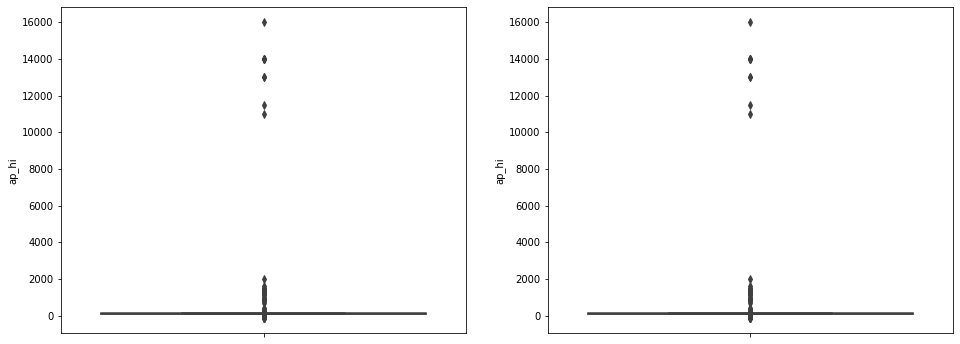

In [11]:
fig,ax=plt.subplots(1,2,figsize=(16,6))
sns.boxplot(y='ap_hi',data=df,ax=ax[0])
sns.boxplot(y='ap_hi',data=df,ax=ax[1])

# clearly we can see that ouliers are present in dataset as such high value of blood-pressure is not possible

### After looking for systolic and diastolic pressure we found that:

![image](https://i.postimg.cc/bwzm4sq5/blood.jpg)

In [12]:
# dropping rows with systolic pressure more than 230 and diastolic pressure 180

u_index = df[(df.ap_hi>230) | (df.ap_lo>150)].index
df.drop(index=u_index,inplace=True)
df.shape

(65770, 12)

* Also we found that a blood pressure reading lower than 90 millimeters of mercury (mm Hg) for the top number (systolic) or 60 mm Hg for the bottom number (diastolic) is generally considered low blood pressure.

In [13]:
# dropping row with systolic pressure lower than 80 and diastolic pressure less than 55

lo_index = df[(df.ap_hi<70) | (df.ap_lo<55)].index
df.drop(index=lo_index,inplace=True)
df.shape

(65460, 12)

IQR: 11.0
upper limit: 186.5
lower limit: 142.5


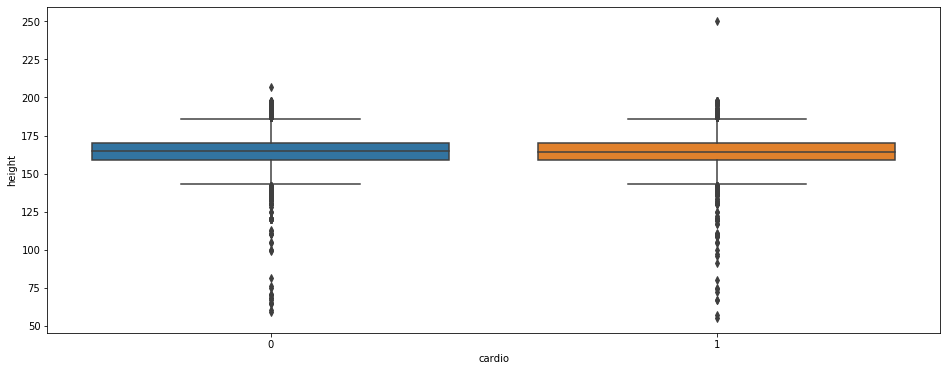

In [14]:
ax=plt.subplots(figsize=(16,6))
sns.boxplot(y='height',x='cardio',data=df)
Q1=df['height'].quantile(0.25)
Q2=df['height'].quantile(0.75)
IQR=Q2-Q1
ul=Q2+IQR*1.5
ll=Q1-IQR*1.5
print('IQR:',IQR)
print('upper limit:',ul)
print('lower limit:',ll)
# outliers present

In [15]:
# dropping rows with height less than 120 cm

index=df[df.height<120].index
df.drop(index=index,axis=0,inplace=True)
df.reset_index(drop=True,inplace=True)

IQR: 17.0
upper limit: 107.5
lower limit: 39.5


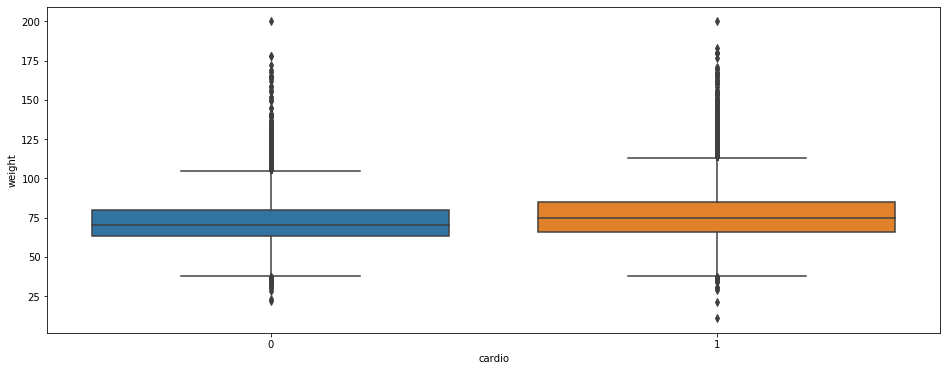

In [16]:
ax=plt.subplots(figsize=(16,6))
sns.boxplot(y='weight',x='cardio',data=df)
Q1=df['weight'].quantile(0.25)
Q2=df['weight'].quantile(0.75)
IQR=Q2-Q1
ul=Q2+IQR*1.5
ll=Q1-IQR*1.5
print('IQR:',IQR)
print('upper limit:',ul)
print('lower limit:',ll)
# outliers present

In [17]:
# droping person whose weight is more than 180

index=df[df.weight>180].index
df.drop(index=index,axis=0,inplace=True)
df.reset_index(drop=True,inplace=True)

In [18]:
# dropping person woth weight less than 30

index=df[df.weight<30].index
df.drop(index=index,axis=0,inplace=True)

In [19]:
df.reset_index(inplace=True,drop=True)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,1,168,62.0,110,80,1,1,0,0,1,0
1,55,0,156,85.0,140,90,3,1,0,0,1,1
2,51,0,165,64.0,130,70,3,1,0,0,0,1
3,48,1,169,82.0,150,100,1,1,0,0,1,1
4,47,0,156,56.0,100,60,1,1,0,0,0,0


In [20]:
df.shape

(65402, 12)

## EDA (Data Analysis)

**UNIVARIATE ANALYSIS**

Text(0.5, 0, 'Age')

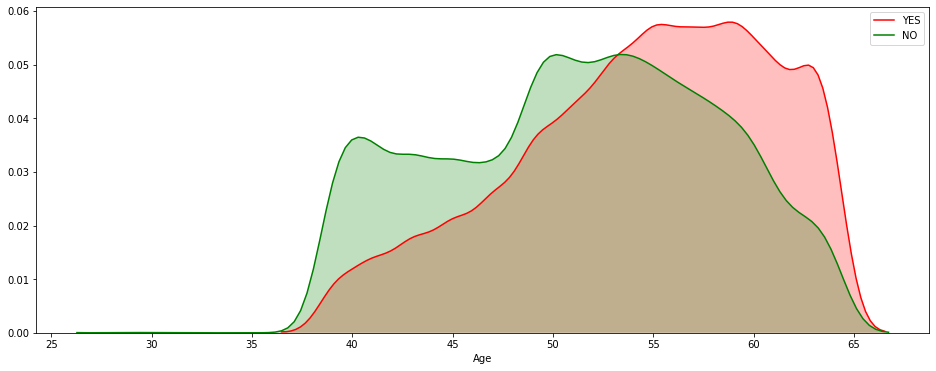

In [21]:
fig,ax=plt.subplots(figsize=(16,6))
sns.kdeplot(df[df.cardio==1]['age'],shade=True,color='r',label='YES') # person has heart disease
sns.kdeplot(df[df.cardio==0]['age'],shade=True,color='g',label='NO') # person dosen't has heart disease
plt.xlabel('Age')

In [22]:
df.groupby('cardio').describe()['age']

,count,mean,std,min,25%,50%,75%,max
cardio,,,,,,,,
0,32233.0,51.218689,6.842558,29.0,46.0,52.0,57.0,64.0
1,33169.0,54.437487,6.380031,39.0,50.0,55.0,60.0,64.0


**Observation:**

Person's suffering from heart related issue tend to have higher age than other ones. As we can see here that **avg age of person having heart disease is 54.43** and others have **51.21**

As per the plot we can see that **pdf curve of person having heart disease is left skewed means person with lower age have less chance of having heart problems.**

Text(0.5, 0, 'weight')

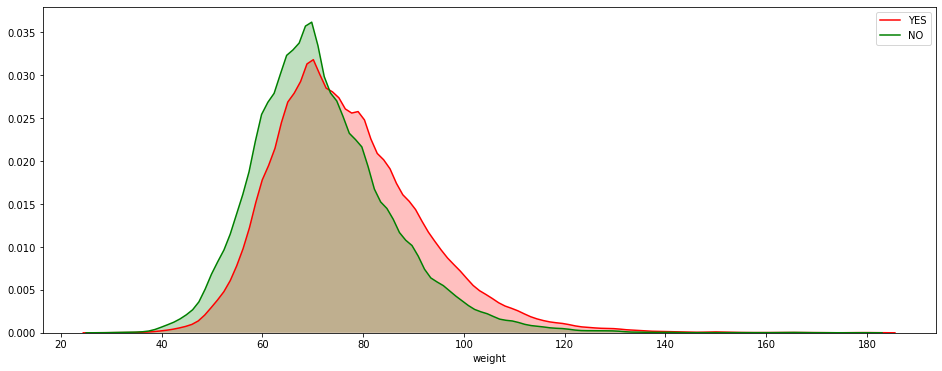

In [23]:
fig,ax=plt.subplots(figsize=(16,6))
sns.kdeplot(df[df.cardio==1]['weight'],shade=True,color='r',label='YES') # person has heart disease
sns.kdeplot(df[df.cardio==0]['weight'],shade=True,color='g',label='NO') # person dosen't has heart disease
plt.xlabel('weight')

In [24]:
df.groupby('cardio').describe()['weight']

,count,mean,std,min,25%,50%,75%,max
cardio,,,,,,,,
0,32233.0,71.895210,13.540306,30.0,63.0,70.0,80.0,178.0
1,33169.0,76.915216,14.878041,30.0,66.0,75.0,85.0,180.0


**Observation:**

person having more weight have higher chance of having heart diseases. As we can see from the graphs and also from the statistical data that Avg. weight of person having heart problems(76.91) is more than those who don't have.

Text(0.5, 0, 'height')

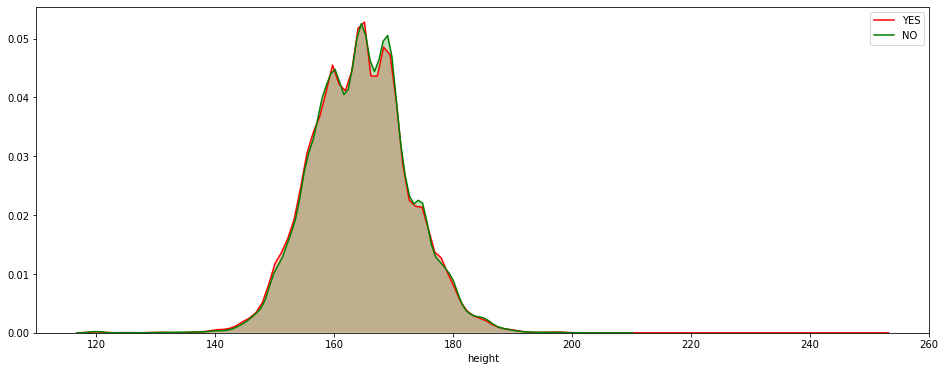

In [25]:
fig,ax=plt.subplots(figsize=(16,6))
sns.kdeplot(df[df.cardio==1]['height'],shade=True,color='r',label='YES') # person has heart disease
sns.kdeplot(df[df.cardio==0]['height'],shade=True,color='g',label='NO') # person dosen't has heart disease
plt.xlabel('height')

In [26]:
df.groupby('cardio').describe()['height']

,count,mean,std,min,25%,50%,75%,max
cardio,,,,,,,,
0,32233.0,164.495021,7.997167,120.0,159.0,165.0,170.0,207.0
1,33169.0,164.316199,8.071956,120.0,159.0,164.0,170.0,250.0


**Observation:**

Height is doesn't play any role in determining heart diseases. As we can see both the plot overlaps and avg height of person with heart problem and without heart problems is also same.

## Blood pressure analysis

Text(0.5, 0, 'blood pressure')

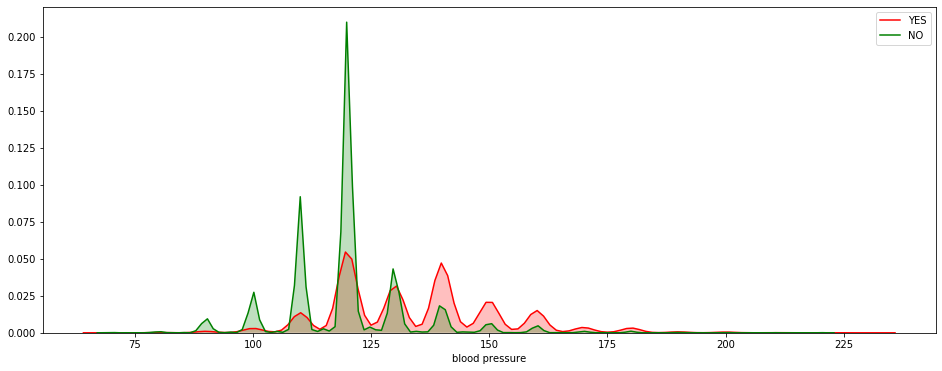

In [27]:
fig,ax=plt.subplots(figsize=(16,6))
sns.kdeplot(df[df.cardio==1]['ap_hi'],shade=True,color='r',label='YES') # person has heart disease
sns.kdeplot(df[df.cardio==0]['ap_hi'],shade=True,color='g',label='NO') # person dosen't has heart disease
plt.xlabel('blood pressure')

In [28]:
df.groupby('cardio').describe()['ap_hi']

,count,mean,std,min,25%,50%,75%,max
cardio,,,,,,,,
0,32233.0,119.617163,12.988661,70.0,110.0,120.0,120.0,220.0
1,33169.0,134.050650,17.373595,70.0,120.0,130.0,140.0,230.0


Text(0.5, 0, 'blood pressure')

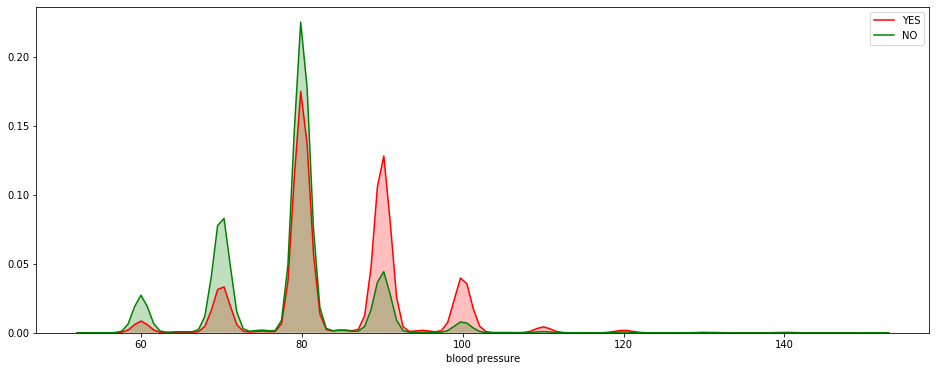

In [29]:
fig,ax=plt.subplots(figsize=(16,6))
sns.kdeplot(df[df.cardio==1]['ap_lo'],shade=True,color='r',label='YES') # person has heart disease
sns.kdeplot(df[df.cardio==0]['ap_lo'],shade=True,color='g',label='NO') # person dosen't has heart disease
plt.xlabel('blood pressure')

In [30]:
df.groupby('cardio').describe()['ap_lo']

,count,mean,std,min,25%,50%,75%,max
cardio,,,,,,,,
0,32233.0,78.141873,8.416221,55.0,70.0,80.0,80.0,150.0
1,33169.0,84.720613,9.707943,55.0,80.0,80.0,90.0,150.0


**Observation:**

As we can see that people who have high blood pressure have high chance that they have heart disease. Avg. Blood pressure of person having heart problems is 134.07 is more than the normal level.

**BIVARIATE ANALYSIS**

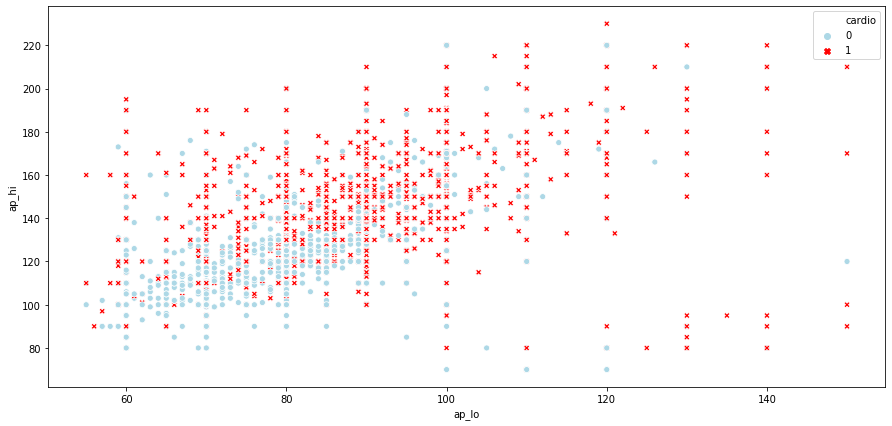

In [31]:
fig,ax=plt.subplots(figsize=(15,7))
sns.scatterplot(y='ap_hi',x='ap_lo',data=df,style='cardio',hue='cardio',ax=ax,palette=['lightblue','red'])

**Observation:**

People with heart problems have higher **systolic pressure and diastolic pressure** values as per the plot.

## Smoke and alcohol analysis

In [32]:
df.groupby('smoke').describe()[['ap_hi','ap_lo']]

ap_hi                                                           \
         count        mean        std   min    25%    50%    75%    max   
smoke                                                                     
0      59379.0  126.818336  16.925017  70.0  120.0  120.0  140.0  230.0   
1       6023.0  128.108916  17.462892  70.0  120.0  120.0  140.0  220.0   

         ap_lo                                                      
         count       mean       std   min   25%   50%   75%    max  
smoke                                                               
0      59379.0  81.405244  9.642444  55.0  80.0  80.0  90.0  150.0  
1       6023.0  82.198738  9.917118  57.0  80.0  80.0  90.0  150.0

In [33]:
df.groupby('alco').describe()[['ap_hi','ap_lo']]

ap_hi                                                           \
        count        mean        std   min    25%    50%    75%    max   
alco                                                                     
0     61733.0  126.817683  16.904816  70.0  120.0  120.0  140.0  230.0   
1      3669.0  128.947942  18.069938  70.0  120.0  120.0  140.0  220.0   

        ap_lo                                                       
        count       mean        std   min   25%   50%   75%    max  
alco                                                                
0     61733.0  81.385434   9.609023  55.0  80.0  80.0  90.0  150.0  
1      3669.0  83.041156  10.534499  59.0  80.0  80.0  90.0  150.0

**Observation:** 

Although there is not much difference but still we can say that **person who smoke or take alcohol have higher blood pressure than other person.** And hence chances that they can have heart problems also increases.

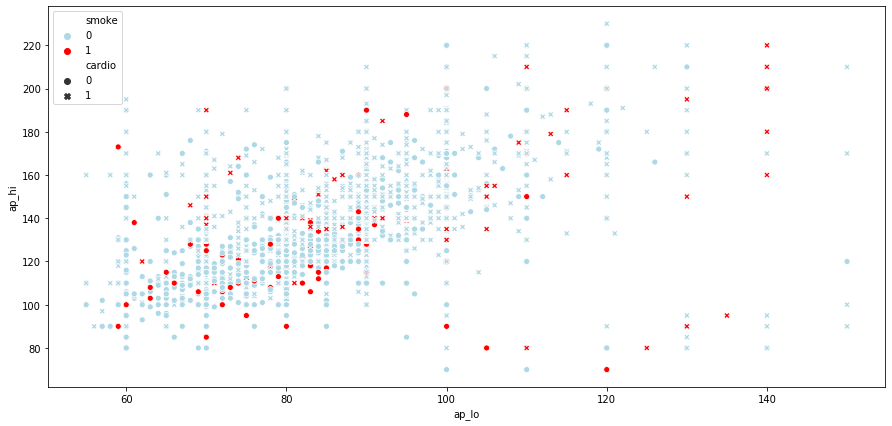

In [34]:
fig,ax=plt.subplots(figsize=(15,7))
sns.scatterplot(y='ap_hi',x='ap_lo',data=df,style='cardio',hue='smoke',ax=ax,palette=['lightblue','red'])

**Observation:** 

plot shows that those who smoke and have high blood pressure are mostly having heart problems because 'red cross' are mostly concentrated on the upper part of the plot 

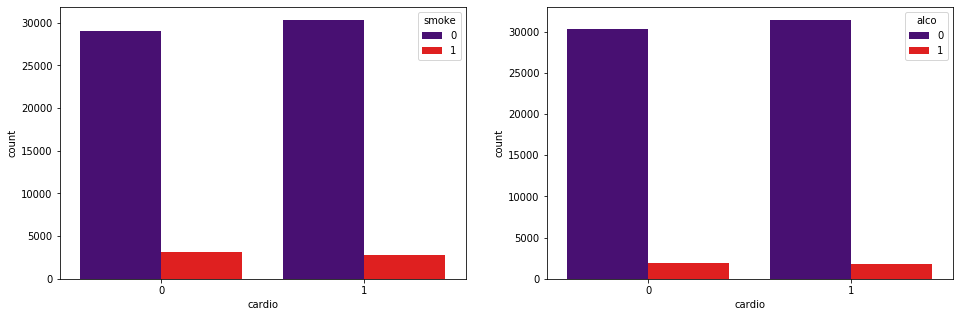

In [35]:
fig,ax=plt.subplots(1,2,figsize=(16,5))
sns.countplot(x='cardio',hue='smoke',data=df,palette=['indigo','r'],ax=ax[0])
sns.countplot(x='cardio',hue='alco',data=df,palette=['indigo','r'],ax=ax[1])

## Cholesterol analysis

In [36]:
df.groupby('cholesterol').describe()[['ap_hi','ap_lo']]

ap_hi                                                           \
               count        mean        std   min    25%    50%    75%    max   
cholesterol                                                                     
1            48313.0  125.074307  16.102531  70.0  120.0  120.0  130.0  220.0   
2             9271.0  130.845324  19.219872  80.0  120.0  130.0  140.0  230.0   
3             7818.0  133.814786  16.868892  70.0  120.0  130.0  140.0  220.0   

               ap_lo                                                       
               count       mean        std   min   25%   50%   75%    max  
cholesterol                                                                
1            48313.0  80.602964   9.349141  55.0  80.0  80.0  90.0  150.0  
2             9271.0  83.161363  10.516369  56.0  80.0  80.0  90.0  150.0  
3             7818.0  84.891916   9.557871  59.0  80.0  80.0  90.0  150.0

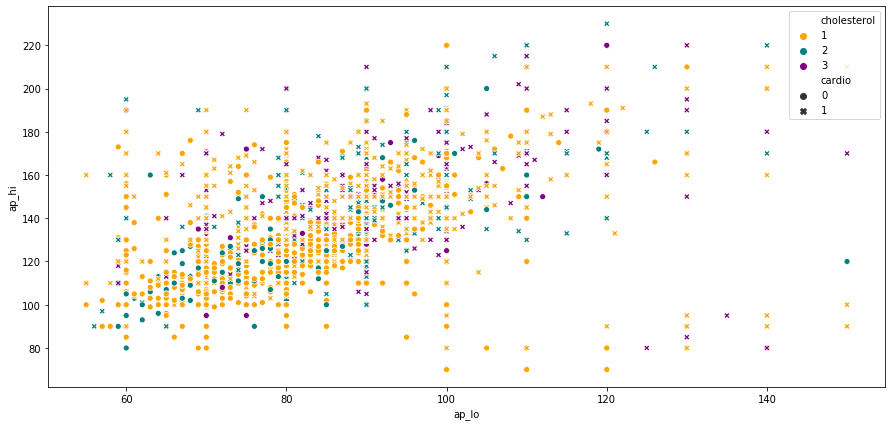

In [37]:
fig,ax=plt.subplots(figsize=(15,7))
sns.scatterplot(y='ap_hi',x='ap_lo',data=df,style='cardio',hue='cholesterol',ax=ax,palette=['orange','teal','purple'])

**Observation:**

person with **high cholesterol level have higher blood pressure and have more chance to have heart problems**

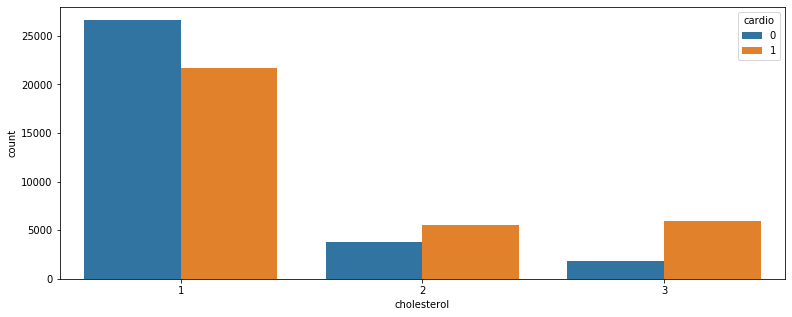

In [38]:
ax=plt.subplots(figsize=(13,5))
sns.countplot(x='cholesterol',hue='cardio',data=df)

**Observation:** 

Most of the Person with **cholesterol level 2 and 3** have  heart disease.

## Gender analysis

In [39]:
df.groupby('gender').describe()[['ap_hi','ap_lo']]

ap_hi                                                           \
          count        mean        std   min    25%    50%    75%    max   
gender                                                                     
0       42143.0  126.234772  17.100570  70.0  120.0  120.0  140.0  230.0   
1       23259.0  128.209897  16.682321  70.0  120.0  120.0  140.0  220.0   

          ap_lo                                                      
          count       mean       std   min   25%   50%   75%    max  
gender                                                               
0       42143.0  81.012458  9.737369  55.0  80.0  80.0  90.0  150.0  
1       23259.0  82.322413  9.490878  55.0  80.0  80.0  90.0  150.0

**Observation:** 

Here we can see that **Male have little bit higher blood pressure than women.** 

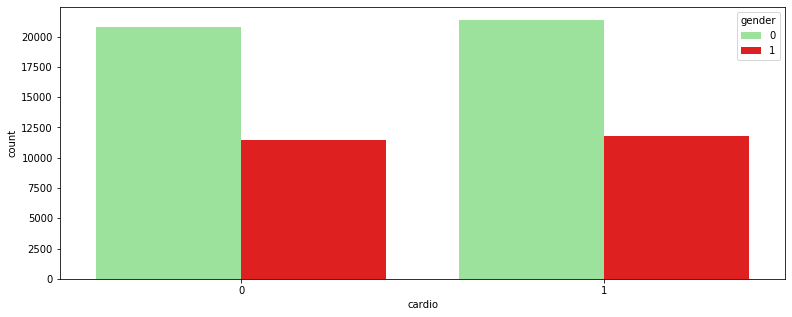

In [40]:
ax=plt.subplots(figsize=(13,5))
sns.countplot(x='cardio',hue='gender',data=df,palette=['lightgreen','r'])

**Observation:**

Over **20000 females and 10000 males have heart diseases**.

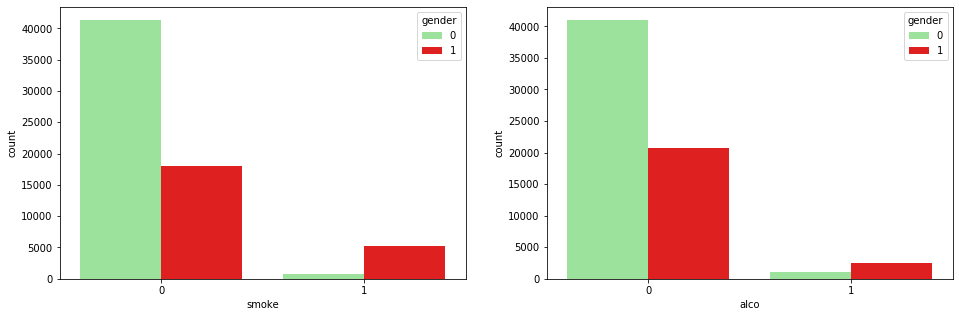

In [41]:
fig,ax=plt.subplots(1,2,figsize=(16,5))
sns.countplot(x='smoke',hue='gender',data=df,palette=['lightgreen','r'],ax=ax[0])
sns.countplot(x='alco',hue='gender',data=df,palette=['lightgreen','r'],ax=ax[1])

# male consume more alcohol and smokes more than females

## Glucose and Physical Activity

In [42]:
df.groupby('gluc').describe()[['ap_hi','ap_lo']]

ap_hi                                                           \
        count        mean        std   min    25%    50%    75%    max   
gluc                                                                     
1     55162.0  126.229850  16.656869  70.0  120.0  120.0  140.0  230.0   
2      5057.0  131.157801  19.537361  80.0  120.0  130.0  140.0  220.0   
3      5183.0  130.347289  16.683565  70.0  120.0  130.0  140.0  220.0   

        ap_lo                                                       
        count       mean        std   min   25%   50%   75%    max  
gluc                                                                
1     55162.0  81.141474   9.564239  55.0  80.0  80.0  90.0  150.0  
2      5057.0  83.485861  10.547711  59.0  80.0  80.0  90.0  140.0  
3      5183.0  83.104573   9.501176  59.0  80.0  80.0  90.0  140.0

In [43]:
df.groupby('active').describe()[['ap_hi','ap_lo']]

ap_hi                                                           \
          count        mean        std   min    25%    50%    75%    max   
active                                                                     
0       13212.0  126.806388  16.778201  70.0  120.0  120.0  140.0  220.0   
1       52190.0  126.970301  17.029742  70.0  120.0  120.0  140.0  230.0   

          ap_lo                                                      
          count       mean       std   min   25%   50%   75%    max  
active                                                               
0       13212.0  81.422116  9.454427  57.0  80.0  80.0  90.0  150.0  
1       52190.0  81.492546  9.724737  55.0  80.0  80.0  90.0  150.0

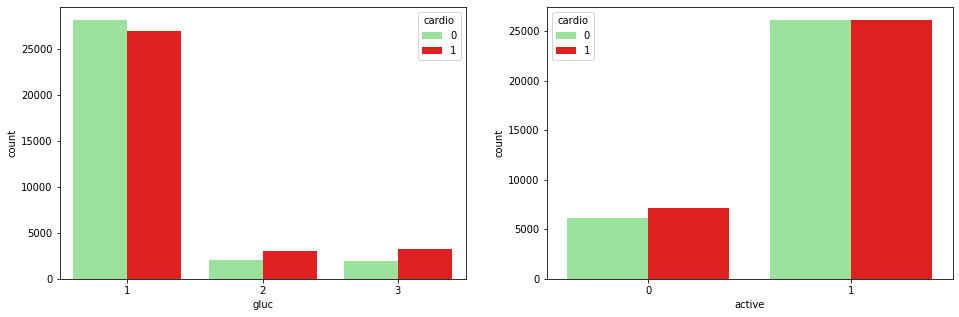

In [44]:
fig,ax=plt.subplots(1,2,figsize=(16,5))
sns.countplot(x='gluc',hue='cardio',data=df,palette=['lightgreen','r'],ax=ax[0])
sns.countplot(x='active',hue='cardio',data=df,palette=['lightgreen','r'],ax=ax[1])

**Observation**: Both the feature dosen't seem to have much correlation with cardiac problems. Hence these features are not that important as others.

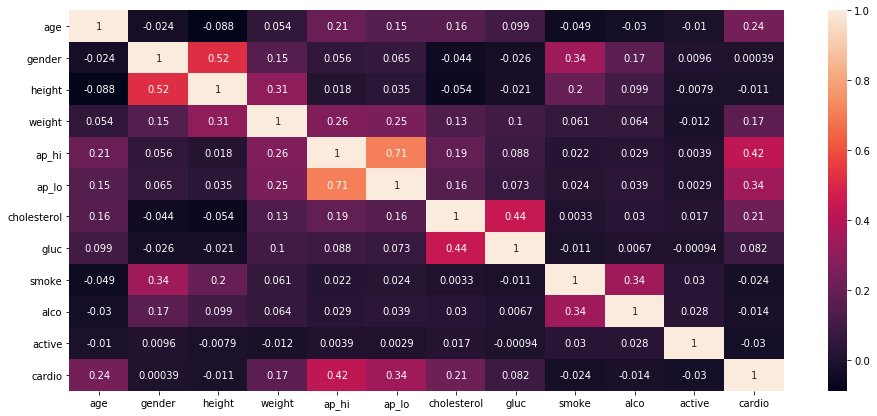

In [45]:
fig,ax = plt.subplots(figsize=(16,7))
sns.heatmap(df.corr(),annot=True,linecolor='r')

## model training

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [48]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [49]:
X = df.loc[:,df.columns!='cardio'].values
Y = df['cardio'].values
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.5,stratify=df['cardio'],random_state=42)  # dataset splitting

In [50]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(32701, 11)
(32701,)
(32701, 11)
(32701,)


## Logistic Regression
---

In [51]:
model = LogisticRegression()
params={'C':[0.001,0.01,0.1,1,10,100],'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
grid = GridSearchCV(model,param_grid=params,cv=3,n_jobs=-1)
grid.fit(X_train,Y_train)
print(grid.best_params_)

{'C': 0.1, 'solver': 'newton-cg'}


In [52]:
y_predict = grid.predict(X_test)

In [53]:
predict_df=pd.DataFrame({'actual':Y_test,'predicted':y_predict})
predict_df.head(7)

,actual,predicted
0,1,0
1,1,1
2,0,0
3,1,1
4,0,1
5,1,1
6,0,0


In [54]:
confusion_matrix(Y_test,y_predict)

array([[12408,  3709],
       [ 5286, 11298]], dtype=int64)

In [55]:
print(classification_report(Y_test,y_predict)) 

# 72% accuracy

              precision    recall  f1-score   support

           0       0.70      0.77      0.73     16117
           1       0.75      0.68      0.72     16584

    accuracy                           0.72     32701
   macro avg       0.73      0.73      0.72     32701
weighted avg       0.73      0.72      0.72     32701



1. High precision relates to the low false positive rate(means predicting negative values better )
1. High recall relates to the low false negative rate(means predicting positive value)

##  KNeighborsClassifier
---

In [56]:
model =  KNeighborsClassifier()
params={'n_neighbors': np.arange(10,200,10)}
grid = GridSearchCV(model,param_grid=params,cv=3)
grid.fit(X_train,Y_train)
print(grid.best_params_)

{'n_neighbors': 100}


In [57]:
y_predict = grid.predict(X_test)
predict_df=pd.DataFrame({'actual':Y_test,'predicted':y_predict})
predict_df.head(7)

,actual,predicted
0,1,0
1,1,1
2,0,0
3,1,1
4,0,1
5,1,1
6,0,0


In [58]:
print(classification_report(Y_test,y_predict)) 

# 72% accuracy

              precision    recall  f1-score   support

           0       0.69      0.77      0.73     16117
           1       0.75      0.67      0.70     16584

    accuracy                           0.72     32701
   macro avg       0.72      0.72      0.72     32701
weighted avg       0.72      0.72      0.72     32701



## Decision tree
---

In [59]:
model = DecisionTreeClassifier()
params={'max_depth': np.arange(5,100,10)}
grid = GridSearchCV(model,param_grid=params,cv=3,n_jobs=2)
grid.fit(X_train,Y_train)
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 5}
0.7245037980130881


In [60]:
y_predict = grid.predict(X_test)
predict_df=pd.DataFrame({'actual':Y_test,'predicted':y_predict})
predict_df.head(7)

,actual,predicted
0,1,0
1,1,1
2,0,0
3,1,1
4,0,1
5,1,1
6,0,0


In [61]:
print(classification_report(Y_test,y_predict)) 

# 73% accuracy

              precision    recall  f1-score   support

           0       0.70      0.78      0.74     16117
           1       0.76      0.68      0.72     16584

    accuracy                           0.73     32701
   macro avg       0.73      0.73      0.73     32701
weighted avg       0.73      0.73      0.73     32701



## Support Vector Classifier
---

In [62]:
model = SVC(C=0.01,kernel='linear')
model.fit(X_train,Y_train) # training algorithm

SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [63]:
y_predict = model.predict(X_test)
predict_df=pd.DataFrame({'actual':Y_test,'predicted':y_predict})
predict_df.head(7)

,actual,predicted
0,1,0
1,1,1
2,0,0
3,1,1
4,0,1
5,1,1
6,0,0


In [64]:
print(classification_report(Y_test,y_predict)) 

# 72% accuracy

              precision    recall  f1-score   support

           0       0.69      0.80      0.74     16117
           1       0.77      0.65      0.70     16584

    accuracy                           0.72     32701
   macro avg       0.73      0.72      0.72     32701
weighted avg       0.73      0.72      0.72     32701



## RandomForestClassifier
---

In [65]:
from sklearn.ensemble import RandomForestClassifier,VotingClassifier

In [66]:
model = RandomForestClassifier()
params={'max_depth': np.arange(3,20,2),'n_estimators': np.arange(10,50,5)}
grid = GridSearchCV(model,param_grid=params,cv=3,n_jobs=2)
grid.fit(X_train,Y_train)
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 9, 'n_estimators': 45}
0.7283874385735171


In [67]:
y_predict = grid.predict(X_test)
predict_df=pd.DataFrame({'actual':Y_test,'predicted':y_predict})
predict_df.head(7)

,actual,predicted
0,1,0
1,1,1
2,0,0
3,1,1
4,0,1
5,1,1
6,0,0


In [68]:
print(classification_report(Y_test,y_predict)) 

# 73% accuracy

              precision    recall  f1-score   support

           0       0.70      0.79      0.74     16117
           1       0.77      0.68      0.72     16584

    accuracy                           0.73     32701
   macro avg       0.74      0.73      0.73     32701
weighted avg       0.74      0.73      0.73     32701



## voting classifier
---

In [69]:
estimator = [
            ('LR',LogisticRegression(C=1,solver='liblinear')),
            ('KNN',KNeighborsClassifier(n_neighbors=170)),
            ('DTC',DecisionTreeClassifier(max_depth=5)),
            ('SVC',SVC(C=0.01,kernel='rbf')),
            ('RFC',RandomForestClassifier(max_depth=9,n_estimators=30))
            ]

vc = VotingClassifier(estimators=estimator,voting='hard') # ensembling different algorithms
vc.fit(X_train,Y_train)

VotingClassifier(estimators=[('LR',
                              LogisticRegression(C=1, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('KNN',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski'...
                                            

In [70]:
y_predict = vc.predict(X_test)
predict_df=pd.DataFrame({'actual':Y_test,'predicted':y_predict})
predict_df.head(7)

,actual,predicted
0,1,0
1,1,1
2,0,0
3,1,1
4,0,1
5,1,1
6,0,0


In [71]:
print(classification_report(Y_test,y_predict)) 

# 73% accuracy

              precision    recall  f1-score   support

           0       0.70      0.79      0.74     16117
           1       0.77      0.67      0.72     16584

    accuracy                           0.73     32701
   macro avg       0.73      0.73      0.73     32701
weighted avg       0.73      0.73      0.73     32701

